# Credit Risk Modelling 

Predict wether or not someone will default. Knowing this information allows us to calculate predicted loss. the amount that a firm losses as a result of loan default. 

Expected loss
Probability of default (PD) x Exposure of default (ED) x loss given default (LGD)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cr_loan = pd.read_csv("cr_loan_nout_nmiss.csv")

# Check the structure of the data
print(cr_loan.dtypes)

# Check the first five rows of the data
cr_loan.head()

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length               int64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5,EDUCATION,B,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1,MEDICAL,C,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4,MEDICAL,C,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8,MEDICAL,C,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2,VENTURE,A,2500,7.14,1,0.25,N,2


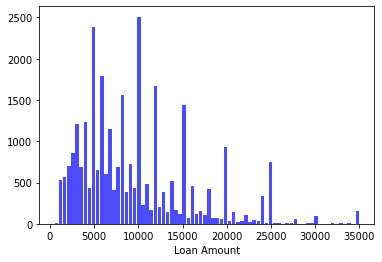

In [4]:
# Look at the distribution of loan amounts with a histogram
n, bins, patches = plt.hist(x=cr_loan['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()

There are 32 000 rows of data so the scatter plot may take a little while to plot.


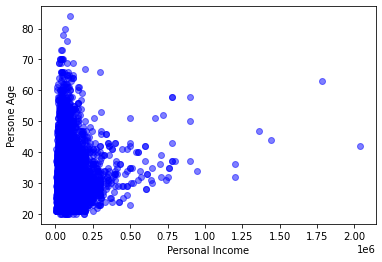

In [5]:
print("There are 32 000 rows of data so the scatter plot may take a little while to plot.")

# Plot a scatter plot of income against age
plt.scatter(cr_loan['person_income'], cr_loan['person_age'],c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Persone Age')
plt.show()

In [6]:
# Create a cross table of the loan intent and loan status
print(pd.crosstab(cr_loan['loan_intent'], cr_loan['loan_status'], margins = True))

loan_status            0     1    All
loan_intent                          
DEBTCONSOLIDATION   3357  1346   4703
EDUCATION           4841  1011   5852
HOMEIMPROVEMENT     2427   863   3290
MEDICAL             3980  1471   5451
PERSONAL            4003  1009   5012
VENTURE             4388   763   5151
All                22996  6463  29459


In [7]:
# Create a cross table of home ownership, loan status, and grade
print(pd.crosstab(cr_loan['person_home_ownership'],[cr_loan['loan_status'],cr_loan['loan_grade']]))

loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               4722  3325  1736  597  167  33  0  217   294  293   
OTHER                    21    25    11    9    1   0  0    3     5    5   
OWN                     787   711   418  243   21   7  0   58    28   24   
RENT                   3266  3804  2452  494  121  24  1  699  1201  887   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                507  141  59  28  
OTHER                     7    5   2   0  
OWN                      17   29   8   5  
RENT                   1439  396  81  25  


In [8]:
# Create a cross table of home ownership, loan status, and average percent income
print(pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'],
              values=cr_loan['loan_percent_income'], aggfunc='mean'))

loan_status                   0         1
person_home_ownership                    
MORTGAGE               0.146389  0.184873
OTHER                  0.144328  0.302222
OWN                    0.178948  0.296509
RENT                   0.144494  0.264452


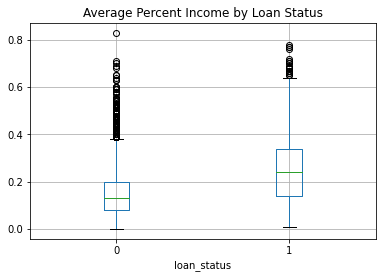

In [10]:
# Create a box plot of percentage income by loan status
cr_loan.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()

It looks like the average percentage of income for defaults is higher. This could indicate those recipients have a debt-to-income ratio that's already too high.